<div style='background-color:orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align:center ; top-padding:5px'>
        Table of Contents
    </h1></i></u></b>
    <li><a href='#imports'>Imports</a>
    <li><a href='#identifycols'>Identify Columns For Exploration</a>
    <li><a href='#questions'>Questions to Answer</a>
    <li><a href='#misc'>Miscellaneous</a>
    </li>
</div>

<div style='background-color:orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Imports
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [1]:
# Vectorization & Dataframe
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# stats
from scipy import stats

# Regex
import re

# .py files
import wrangle as w

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set default matplotlib plot style to 'bmh'
# mpl.style.use('bmh')

<div style='background-color:orange'>
<a id='identifycols'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Identify Columns For Exploration
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    </li>
</div>

In [3]:
# Get the master filtered dataset
master = w.wrangle()
master.head(3)

,crash_id,$1000_damage_to_any_one_person's_property,active_school_zone_flag,adjusted_average_daily_traffic_amount,adjusted_percentage_of_average_daily_traffic_for_trucks,adjusted_roadway_part,agency,at_intersection_flag,average_daily_traffic_amount,average_daily_traffic_year,...,charge,citation,person_age,person_ethnicity,person_gender,person_helmet,person_injury_severity,person_type,physical_location_of_an_occupant,crash_datetime
0,16189632,No,NO,no data,no data,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,no data,no data,...,OPERATE UNREGISTERED MOTOR VEHICLE,TX52Q80UKZPL,37,W - WHITE,1 - MALE,1 - NOT WORN,A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-01 11:23:00
1,16203470,No,NO,no data,no data,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,no data,no data,...,"NO CLASS ""M"" LICENSE",TX52QD0NAP34,30,H - HISPANIC,1 - MALE,"3 - WORN, NOT DAMAGED",B - SUSPECTED MINOR INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-04 13:16:00
2,16192023,Yes,NO,no data,no data,1 - MAIN/PROPER LANE,HARRIS COUNTY SHERIFF'S OFFICE,False,no data,no data,...,NO CHARGES,no data,21,W - WHITE,1 - MALE,"2 - WORN, DAMAGED",A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-05 20:45:00


<div style='background-color:orange'>
<a id='questions'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Questions to Answer
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    <li><a href='#seasonality'>Seasonality</a>
    <li><a href='#question2'>Question 2</a>
    <li><a href='#question3'>Question 3</a>
    <li><a href='#question4'>Question 4</a>
    </li>
</div>

<a id='question1'></a>
<h3><b><i>
    Question 1
</i></b></h3>
<li><a href='#questions'>Questions to Answer Top</a></li>

1. Does time of day matter?

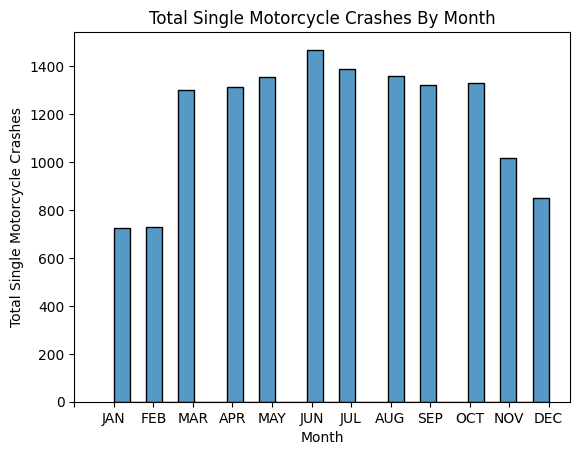

In [4]:
sns.histplot(data=master, x='crash_month')
plt.title('Total Single Motorcycle Crashes By Month')
plt.xlabel('Month')
plt.xticks(ticks=range(13), labels=['', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.ylabel('Total Single Motorcycle Crashes')
plt.show()

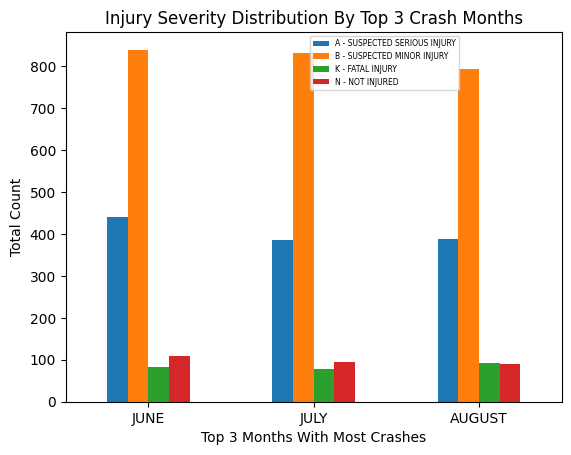

In [5]:
top3months = master[master.crash_datetime.dt.month.isin([6, 7, 8])]
ct = pd.crosstab(top3months.crash_datetime.dt.month, top3months.person_injury_severity)
ax = ct.plot(kind='bar')
plt.title('Injury Severity Distribution By Top 3 Crash Months')
plt.xlabel('Top 3 Months With Most Crashes')
plt.xticks(ticks=range(3), labels=['JUNE', 'JULY', 'AUGUST'], rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 5.5})  # Set the size of the legend
legend.set_bbox_to_anchor((0.8, 1))
plt.show()

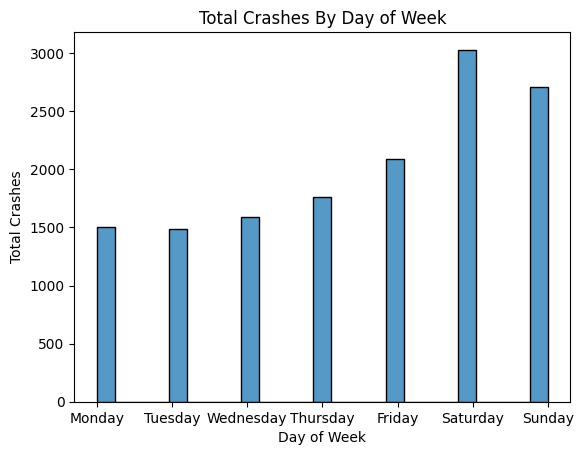

In [6]:
sns.histplot(data=master, x=master.crash_datetime.dt.dayofweek)
plt.title('Total Crashes By Day of Week')
plt.xlabel('Day of Week')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Total Crashes')
plt.show()

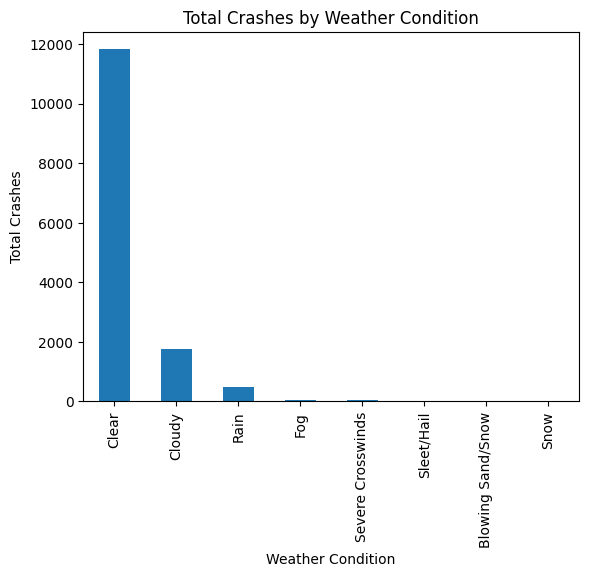

In [7]:
weather_stuff = master[master.weather_condition.str.startswith(('1', '2', '3', '4', '5', '6', '7', '8'))]
weather_stuff.weather_condition.value_counts().plot(kind='bar')
plt.title('Total Crashes by Weather Condition')
plt.xlabel('Weather Condition')
plt.xticks(ticks=range(8), labels=['Clear', 'Cloudy', 'Rain', 'Fog', 'Severe Crosswinds', 'Sleet/Hail', 'Blowing Sand/Snow', 'Snow'], rotation=90)
plt.ylabel('Total Crashes')
plt.show()

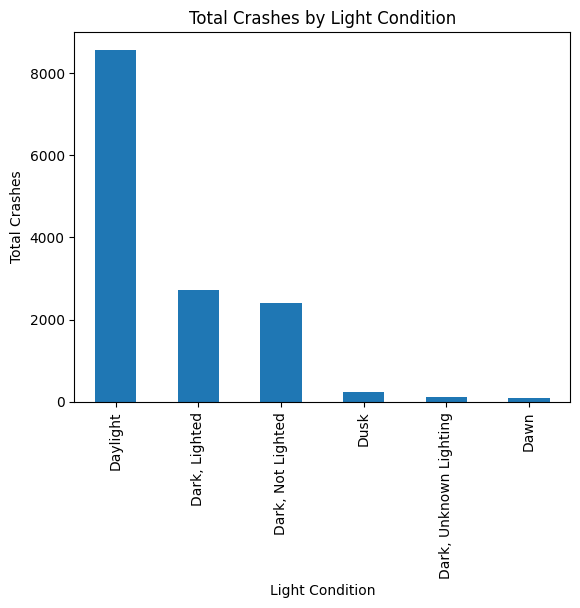

In [8]:
light_stuff = master[master.light_condition.str.startswith(('1', '2', '3', '4', '5', '6'))]
light_stuff.light_condition.value_counts().plot(kind='bar')
plt.title('Total Crashes by Light Condition')
plt.xlabel('Light Condition')
plt.xticks(ticks=range(6), labels=['Daylight', 'Dark, Lighted', 'Dark, Not Lighted', 'Dusk', 'Dark, Unknown Lighting', 'Dawn'], rotation=90)
plt.ylabel('Total Crashes')
plt.show()

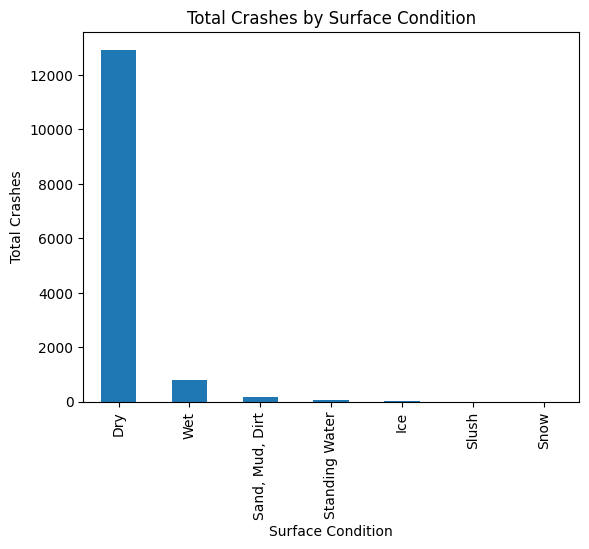

In [9]:
surface_stuff = master[master.surface_condition.str.startswith(('1', '2', '3', '4', '5', '6', '7'))]
surface_stuff.surface_condition.value_counts().plot(kind='bar')
plt.title('Total Crashes by Surface Condition')
plt.xlabel('Surface Condition')
plt.xticks(ticks=range(7), labels=['Dry', 'Wet', 'Sand, Mud, Dirt', 'Standing Water', 'Ice', 'Slush', 'Snow'], rotation=90)
plt.ylabel('Total Crashes')
plt.show()

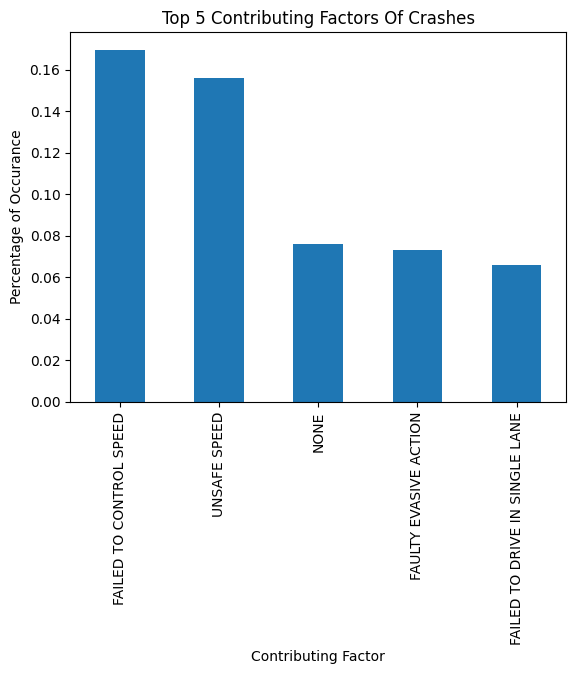

In [10]:
cont_factor = master[~master.contributing_factors.str.startswith('OTHER')]
cont_factor.contributing_factors.value_counts(normalize=True).head().plot(kind='bar')
plt.title('Top 5 Contributing Factors Of Crashes')
plt.xlabel('Contributing Factor')
plt.ylabel('Percentage of Occurance')
plt.show()

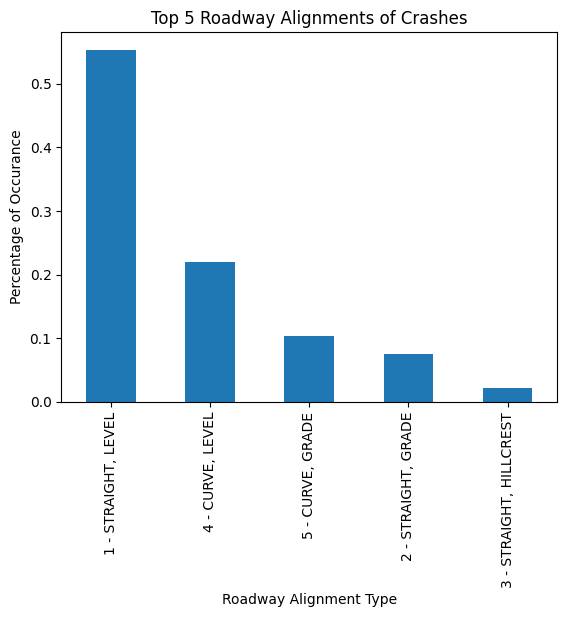

In [11]:
master.roadway_alignment.value_counts(normalize=True).head().plot(kind='bar')
plt.title('Top 5 Roadway Alignments of Crashes')
plt.xlabel('Roadway Alignment Type')
plt.ylabel('Percentage of Occurance')
plt.show()

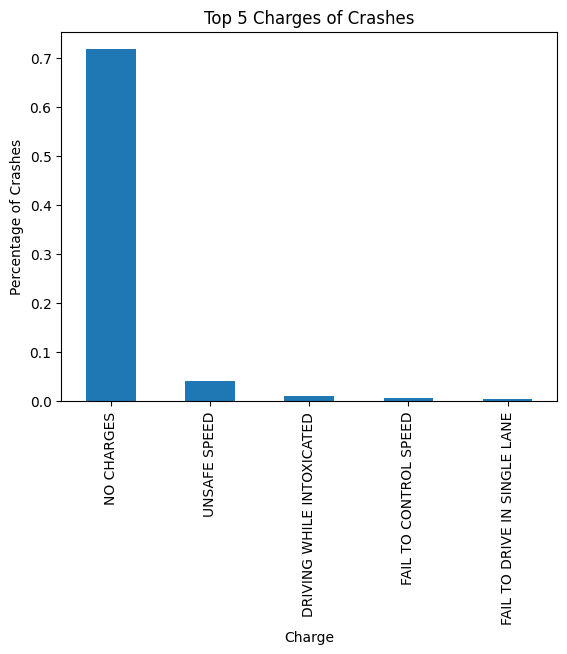

In [12]:
master.charge.value_counts(normalize=True).head().plot(kind='bar')
plt.title('Top 5 Charges of Crashes')
plt.xlabel('Charge')
plt.ylabel('Percentage of Crashes')
plt.show()

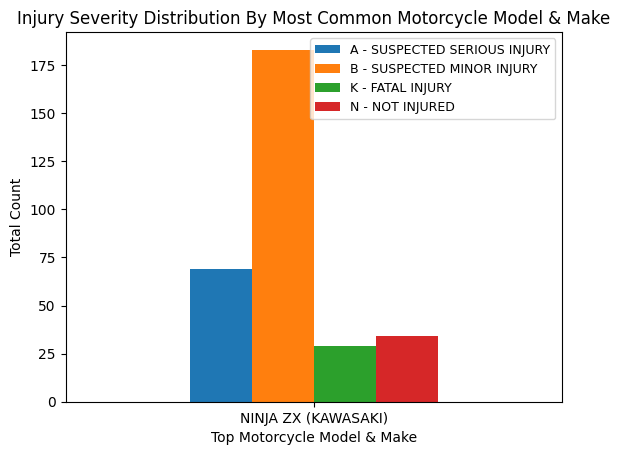

In [13]:
top_makemodel = master[master.vehicle_model_name == 'NINJA ZX (KAWASAKI)']
ct = pd.crosstab(top_makemodel.vehicle_model_name, top_makemodel.person_injury_severity)
ax = ct.plot(kind='bar')
plt.title('Injury Severity Distribution By Most Common Motorcycle Model & Make')
plt.xlabel('Top Motorcycle Model & Make')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 9})  # Set the size of the legend
#legend.set_bbox_to_anchor((0.8, 1))
plt.show()

In [14]:
top_makemodel.vehicle_defect_1.value_counts()

vehicle_defect_1
no data                                300
98 - OTHER  (EXPLAIN IN NARRATIVE)       6
12 - DEFECTIVE OR SLICK TIRES            3
10 - DEFECTIVE OR NO VEHICLE BRAKES      3
11 - DEFECTIVE STEERING MECHANISM        3
Name: count, dtype: int64

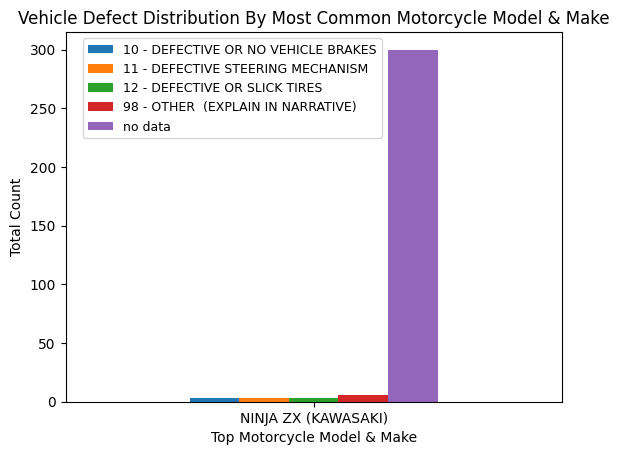

In [15]:
ct = pd.crosstab(top_makemodel.vehicle_model_name, top_makemodel.vehicle_defect_1)
ax = ct.plot(kind='bar')
plt.title('Vehicle Defect Distribution By Most Common Motorcycle Model & Make')
plt.xlabel('Top Motorcycle Model & Make')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 9})  # Set the size of the legend
legend.set_bbox_to_anchor((0.65, 1))
plt.show()

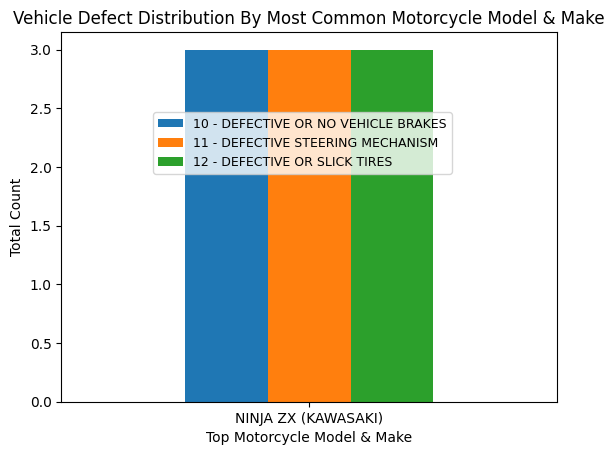

In [16]:
smaller_top_makemodel = top_makemodel[~top_makemodel.vehicle_defect_1.str.startswith(('no data', '98 - OTHER  (EXPLAIN IN NARRATIVE)'))]
ct = pd.crosstab(smaller_top_makemodel.vehicle_model_name, smaller_top_makemodel.vehicle_defect_1)
ax = ct.plot(kind='bar')
plt.title('Vehicle Defect Distribution By Most Common Motorcycle Model & Make')
plt.xlabel('Top Motorcycle Model & Make')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 9})  # Set the size of the legend
legend.set_bbox_to_anchor((0.8, 0.8))
plt.show()

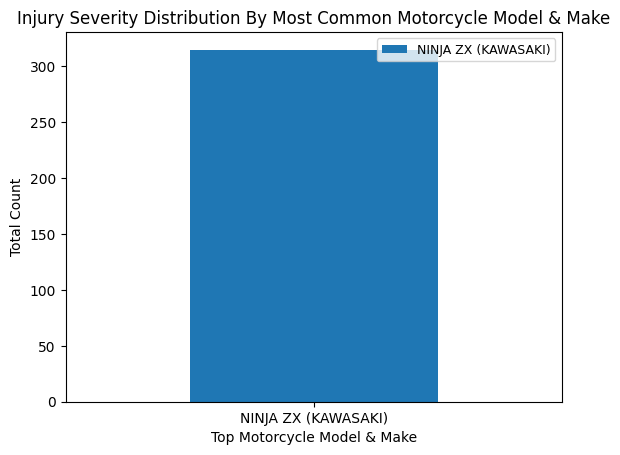

In [17]:
top_makemodel = master[master.vehicle_model_name == 'NINJA ZX (KAWASAKI)']
ct = pd.crosstab(top_makemodel.vehicle_model_name, top_makemodel.vehicle_model_name)
ax = ct.plot(kind='bar')
plt.title('Injury Severity Distribution By Most Common Motorcycle Model & Make')
plt.xlabel('Top Motorcycle Model & Make')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
legend = plt.legend(loc='upper right', prop={'size': 9})  # Set the size of the legend
#legend.set_bbox_to_anchor((0.8, 1))
plt.show()

In [18]:
master = pd.read_csv('master_modeling_updated1.csv')
master

,crash_id,person_age,person_ethnicity,person_gender,has_motocycle_endorsment,person_injury_severity,vehicle_body_style,vehicle_color,vehicle_make,vehicle_model,vehicle_model_year,vehicle_make_country,injury_binary
0,16189632,37,w - white,1 - male,0,a - suspected serious injury,mc - motorcycle,blu - blue,harley-davidson,fld,2007,USA,1
1,16203470,30,h - hispanic,1 - male,0,b - suspected minor injury,mc - motorcycle,gry - gray,suzuki,gsx-r600,2004,Japan,1
2,16192023,21,w - white,1 - male,0,a - suspected serious injury,mc - motorcycle,blu - blue,yamaha,yzfr6,2017,Japan,1
3,16196720,18,h - hispanic,1 - male,0,b - suspected minor injury,mc - motorcycle,blu - blue,yamaha,rz500,2002,Japan,1
4,16189103,28,w - white,1 - male,1,b - suspected minor injury,mc - motorcycle,blk - black,harley-davidson,fxdf,2009,USA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14129,19321499,49,w - white,2 - female,1,b - suspected minor injury,mc - motorcycle,blk - black,yamaha,xvs1100,2013,Japan,1
14130,19323296,33,w - white,1 - male,1,a - suspected serious injury,mc - motorcycle,grn - green,kawasaki,kx250,2019,Japan,1
14131,19327850,35,w - white,1 - male,1,a - suspected serious injury,mc - motorcycle,blk - black,honda,cr250,2016,Japan,1
14132,19330330,42,b - black,2 - female,1,b - suspected minor injury,mc - motorcycle,mul - multicolored,honda,cbr650,2016,Japan,1


In [19]:
# Top 3 make model and injury distribution
#master['make_and_model'] = master.vehicle_make + ', ' + master.vehicle_model
#top3list = master.make_and_model.value_counts().head(3).index.to_list()
#top3makemodel = master[master.make_and_model.isin(top3list)]
#pd.crosstab(top3makemodel.make_and_model, top3makemodel.person_injury_severity).plot(kind='bar')
#plt.title('Injury Severity Distribution By Top 3 Motorcycle Model & Make')
#plt.xlabel('Motorcycle Make & Model')
#plt.xticks(rotation=0)
#plt.ylabel('Total Count')
#plt.title()

In [21]:
# Bottom 3 make model and injury distribution
#master['make_and_model'] = master.vehicle_make + ', ' + master.vehicle_model
#bottom3list = master.make_and_model.value_counts().tail(3).index.to_list()
#bottom3makemodel = master[master.make_and_model.isin(bottom3list)]
#pd.crosstab(bottom3makemodel.make_and_model, bottom3makemodel.person_injury_severity).plot(kind='bar')
#plt.title('Injury Severity Distribution By Bottom 3 Motorcycle Model & Make')
#plt.xlabel('Motorcycle Make & Model')
#plt.xticks(rotation=0)
#plt.ylabel('Total Count')
#plt.title()

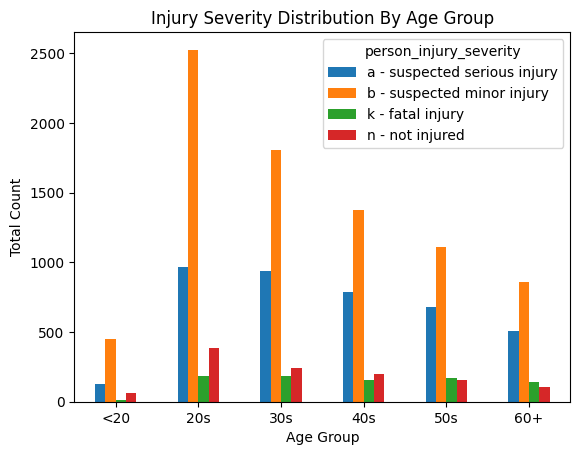

In [22]:
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['<20', '20s', '30s', '40s', '50s', '60+']
master['age_range'] = pd.cut(master['person_age'], bins=bins, labels=labels, right=False)
pd.crosstab(master.age_range, master.person_injury_severity).plot(kind='bar')
plt.title('Injury Severity Distribution By Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Total Count')
plt.show()

In [23]:
master.person_ethnicity.value_counts()

person_ethnicity
w - white                          9111
h - hispanic                       2944
b - black                          1634
a - asian                           223
98 - other                          125
99 - unknown                         53
i - amer. indian/alaskan native      44
Name: count, dtype: int64

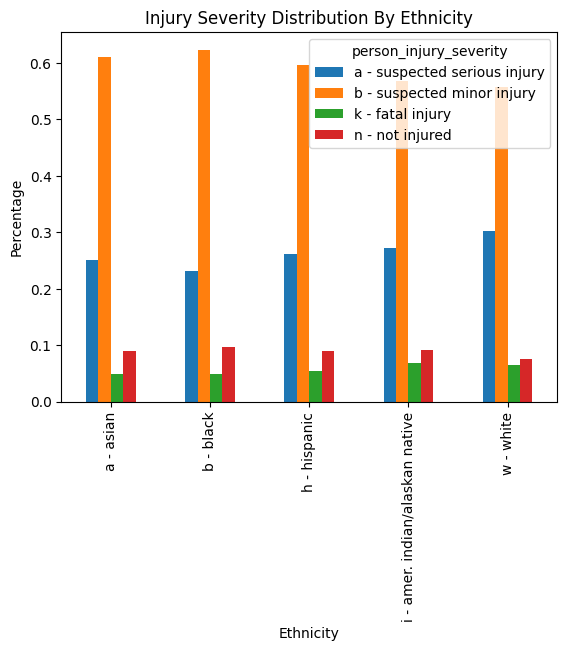

In [24]:
ethnicitystuff = master[~master.person_ethnicity.str.startswith(('98', '99'))]
ethniccross = pd.crosstab(ethnicitystuff.person_ethnicity, ethnicitystuff.person_injury_severity, normalize='index').plot(kind='bar')
plt.title('Injury Severity Distribution By Ethnicity')
plt.xlabel('Ethnicity')
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.show()

<div style='background-color:orange'>
<a id='misc'></a>
    <b><u><i><h1 style='text-align:center ; padding-top:5px'>
        Miscellaneous
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a>
    <li><a href='#miscage'>Age</a>
    <li><a href='#miscethnicity'>Ethnicity</a>
    <li><a href='#miscmotorcycleendorsement'>Motorcycle Endorsement</a>
    <li><a href='#miscvehiclebodystyle'>Vehicle Body Style</a>
    <li><a href='#miscvehiclecolor'>Vehicle Color</a>
    <li><a href='#miscvehiclemake'>Vehicle Make</a>
    <li><a href='#miscvehiclemodel'>Vehicle Model</a>
    <li><a href='#miscvehiclemodelyear'>Vehicle Model Year</a>
    <li><a href='#miscvehiclemakecountry'>Vehicle Make Country</a>
    <li><a href='#miscmakeandmodel'>Make And Model</a>
    </li>
</div>

<a id='miscage'></a>
<h3><b><i>
    Age
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The age group of the motorcyclist does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The age group of the motorcyclist does make a significant difference in the injury severity of single motorcycle crashes in Texas.

In [73]:
bins = [0, 30, 40, 50, 60, float('inf')]
labels = ['20s', '30s', '40s', '50s', '60+']
master['age_range'] = pd.cut(master['person_age'], bins=bins, labels=labels, right=False)

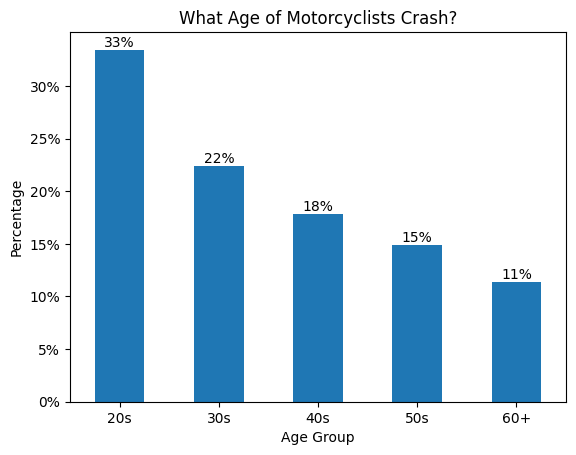

In [75]:
ax = master.age_range.value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title('What Age of Motorcyclists Crash?')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.yticks(ticks=[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3], labels=['0%', '5%', '10%', '15%', '20%', '25%', '30%'])
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [ ]:
cross_tab = pd.crosstab(master.age_range, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

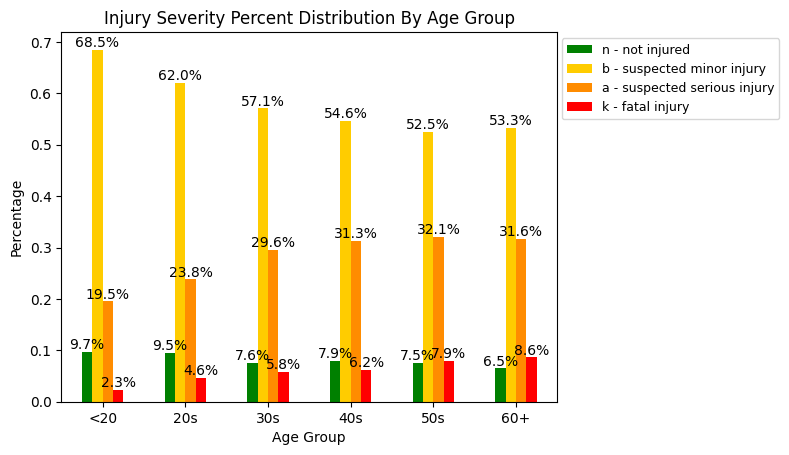

In [25]:
cross_tab = pd.crosstab(master.age_range, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [26]:
for vals in master.age_range.unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.age_range == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mAge Range:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mAge Range:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: 30s
Injury: 1
Statistic: 1.7690344188685856
P-Value: 0.18350162245742066

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: 30s
Injury: 0
Statistic: 1.7690344188685854
P-Value: 0.1835016224574207

========== REJECT NULL HYPOTHESIS ==========
Age Range: 20s
Injury: 1
Statistic: 13.950600959071485
P-Value: 0.0001876776498812034

========== REJECT NULL HYPOTHESIS ==========
Age Range: 20s
Injury: 0
Statistic: 13.950600959071487
P-Value: 0.00018767764988120327

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: <20
Injury: 1
Statistic: 1.9382624994166442
P-Value: 0.1638573134420157

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: <20
Injury: 0
Statistic: 1.9382624994166442
P-Value: 0.1638573134420157

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: 40s
Injury: 1
Statistic: 0.26599402896997026
P-Value: 0.6060317596251912

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: 40s
Injury: 0
Statistic: 0.26599

<b><i>
    REJECT NULL HYPOTHESIS - FOR 20s and 60+!
</i></b>

The age group of the motorcyclist does make a significant difference in the injury severity of single motorcycle crashes in Texas.

- AGE // REJECT VALUES
    - 20s // 1, 0
    - 60+ // 1, 0

---

<a id='miscethnicity'></a>
<h3><b><i>
    Ethnicity
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The ethnicity of the motorcyclist does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The ethnicity of the motorcyclist does make a significant difference in the injury severity of single motorcycle crashes in Texas.

In [ ]:
cross_tab = pd.crosstab(master.person_ethnicity[~master.person_ethnicity.str.startswith(('98', '99'))], master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Ethnicity')
plt.xlabel('Ethnicity')
plt.xticks(rotation=0, ticks=range(5), labels=['Asian', 'Black', 'Hispanic', 'Native American', 'White'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [ ]:
for vals in master.person_ethnicity[~master.person_ethnicity.str.startswith(('98', '99'))].unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.person_ethnicity == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mEthnicity:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mEthnicity:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

<b><i>
    REJECT NULL HYPOTHESIS - FOR BLACK AND WHITE!
</i></b>

The ethnicity of the motorcyclist does make a significant difference in the injury severity of single motorcycle crashes in Texas.

- ETHNICITY // REJECT VALUES
    - White // 1, 0
    - Black // 1, 0

---

<a id='miscmotorcycleendorsement'></a>
<h3><b><i>
    Motorcycle Endorsement
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> Whether or not the motorcyclist has a motorcycle endorsement does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> Whether or not the motorcyclist has a motorcycle endorsement does make a significant difference in the injury severity of single motorcycle crashes in Texas.

In [ ]:
cross_tab = pd.crosstab(master.has_motocycle_endorsment, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Motorcycle Endorsement')
plt.xlabel('Has Motorcycle Endorsement')
plt.xticks(rotation=0, ticks=range(2), labels=['False', 'True'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [ ]:
for vals in master.has_motocycle_endorsment.unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.has_motocycle_endorsment == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mMotorcycle Endorsement:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mMotorcycle Endorsement:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

<b><i>
    ACCEPT NULL HYPOTHESIS!
</i></b>

Whether or not the motorcyclist has a motorcycle endorsement does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

---

<a id='miscvehiclebodystyle'></a>
<h3><b><i>
    Vehicle Body Style
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The body style of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The body style of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

In [ ]:
cross_tab = pd.crosstab(master.vehicle_body_style, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Motorcycle Body Style')
plt.xlabel('Motorcycle Body Style')
plt.xticks(rotation=0, ticks=range(2), labels=['Motorcycle', 'Police Motorcycle'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [ ]:
for vals in master.vehicle_body_style.unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.vehicle_body_style == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mMotorcycle Body Style:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mMotorcycle Body Style:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

<b><i>
    ACCEPT NULL HYPOTHESIS!
</i></b>

The body style of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

---

<a id='miscvehiclecolor'></a>
<h3><b><i>
    Vehicle Color
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The color of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The color of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

In [ ]:
cross_tab = pd.crosstab(master.vehicle_color.str.startswith(('bro', 'gld')), master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Motorcycle Color (Brown, Gold)')
plt.xlabel('Motorcycle Color')
plt.xticks(rotation=0, ticks=range(2), labels=['Brown', 'Gold'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [ ]:
for vals in master.vehicle_color.unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.vehicle_color == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mMotorcycle Color:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mMotorcycle Color:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

<b><i>
    ACCEPT NULL HYPOTHESIS!
</i></b>

The color of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

---

<a id='miscvehiclemake'></a>
<h3><b><i>
    Vehicle Make
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The make of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The make of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

In [ ]:
cross_tab = pd.crosstab(master[master.vehicle_make.isin(master.vehicle_make.value_counts().head().index)].vehicle_make, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Top 5 Motorcycle Makes')
plt.xlabel('Top 5 Motorcycle Makes')
plt.xticks(rotation=0, ticks=range(5), labels=['Harley-Davidson', 'Honda', 'Yamaha', 'Kawasaki', 'Suzuki'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [ ]:
for vals in master.vehicle_make.unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.vehicle_make == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mVehicle Make:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mVehicle Make:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

<b><i>
    REJECT NULL HYPOTHESIS - FOR SOME!
</i></b>

The make of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

- MAKE // REJECT VALUES
    - Honda // 1, 0
    - BMW // 1, 0
    - Polaris // 1, 0
    - Husqvarna // 1, 0
    - Polar // 1, 0

---

<a id='miscvehiclemodel'></a>
<h3><b><i>
    Vehicle Model
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The model of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The model of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

In [ ]:
cross_tab = pd.crosstab(master[master.vehicle_model.isin(master.vehicle_model.value_counts().head().index)].vehicle_model, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Top 5 Motorcycle Models')
plt.xlabel('Top 5 Motorcycle Models')
plt.xticks(rotation=0, ticks=range(5), labels=['FLD', 'CBR600', 'YZFR1', 'Ninja ZX', 'GSX'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [ ]:
for vals in master.vehicle_model.unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.vehicle_model == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mVehicle Model:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mVehicle Model:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

<b><i>
    REJECT NULL HYPOTHESIS - FOR SOME!
</i></b>

The model of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

- MODEL // INJURY TYPE
    - X1883 // 1, 0
    - R1100 // 1, 0
    - G11800 // 1, 0
    - F1TRU // 1, 0
    - GSX1300 // 1, 0
    - F1TR // 1, 0
    - GSX-R750 // 1, 0
    - Slingshot // 1, 0
    - XJ650 // 1, 0
    - FJR1300 // 1, 0

---

<a id='miscvehiclemodelyear'></a>
<h3><b><i>
    Vehicle Model Year
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The model year of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The model year of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

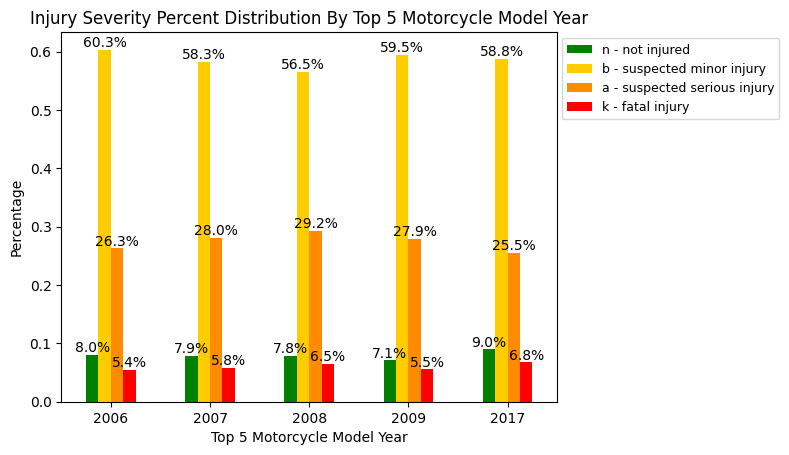

In [36]:
cross_tab = pd.crosstab(master[master.vehicle_model_year.isin(master.vehicle_model_year.value_counts().head().index)].vehicle_model_year, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Top 5 Motorcycle Model Year')
plt.xlabel('Top 5 Motorcycle Model Year')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [241]:
for vals in master[master.vehicle_model_year > 999].vehicle_model_year.unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.vehicle_model_year == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mModel Year:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mModel Year:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2007
Injury: 1
Statistic: 0.0888335187762094
P-Value: 0.7656653655802581

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2007
Injury: 0
Statistic: 0.08883351877620939
P-Value: 0.7656653655802581

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2004
Injury: 1
Statistic: 0.021826869698624886
P-Value: 0.8825485980115167

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2004
Injury: 0
Statistic: 0.021826869698624886
P-Value: 0.8825485980115167

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2017
Injury: 1
Statistic: 0.5349472144825212
P-Value: 0.4645343416062917

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2017
Injury: 0
Statistic: 0.5349472144825212
P-Value: 0.4645343416062917

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2002
Injury: 1
Statistic: 0.05876190451494362
P-Value: 0.8084636109300221

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 2002
Injury: 0
Stati

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1986
Injury: 0
Statistic: 0.11832202043075879
P-Value: 0.7308615675015205

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1994
Injury: 1
Statistic: 0.00933923536958162
P-Value: 0.9230125125657405

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1994
Injury: 0
Statistic: 0.009339235369581622
P-Value: 0.9230125125657405

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1984
Injury: 1
Statistic: 0.03090336658564061
P-Value: 0.8604561496749974

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1984
Injury: 0
Statistic: 0.030903366585640614
P-Value: 0.8604561496749974

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1979
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Model Year: 1979
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== REJECT NULL HYPOTHESIS ==========
Model Year: 1982
Injury: 1
Statistic: 3.9852107866580955
P-Value: 0.045901357162842396

===

<b><i>
    REJECT NULL HYPOTHESIS - FOR MOST!
</i></b>

The model year of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

(10 - DEFECTIVE OR NO VEHICLE BRAKES rejects only serious and minor injuries, almost rejects fatal)

---

<a id='miscvehiclemakecountry'></a>
<h3><b><i>
    Vehicle Make Country
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The make country of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The make country of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

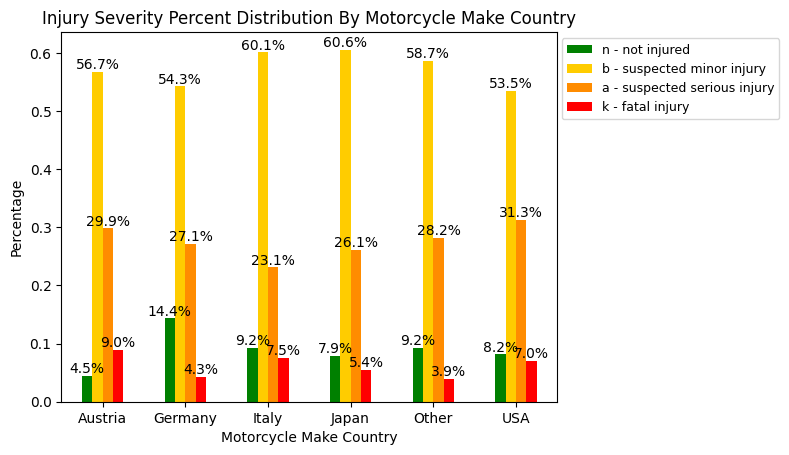

In [37]:
cross_tab = pd.crosstab(master.vehicle_make_country, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Motorcycle Make Country')
plt.xlabel('Motorcycle Make Country')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [242]:
for vals in master.vehicle_make_country.unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.vehicle_make_country == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mMake Country:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mMake Country:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: USA
Injury: 1
Statistic: 0.0001147099851115574
P-Value: 0.9914546005131627

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: USA
Injury: 0
Statistic: 0.00011470998511155741
P-Value: 0.9914546005131627

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: Japan
Injury: 1
Statistic: 1.5080002880181704
P-Value: 0.21944447841886616

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: Japan
Injury: 0
Statistic: 1.5080002880181707
P-Value: 0.2194444784188662

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: Other
Injury: 1
Statistic: 1.378007251503984
P-Value: 0.24044087670206332

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: Other
Injury: 0
Statistic: 1.378007251503984
P-Value: 0.24044087670206332

========== REJECT NULL HYPOTHESIS ==========
Make Country: Germany
Injury: 1
Statistic: 8.910550092260186
P-Value: 0.0028352784579413373

========== REJECT NULL HYPOTHESIS ==========
Make Coun

<b><i>
    REJECT NULL HYPOTHESIS - ONLY GERMANY!
</i></b>

The make country of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

---

<a id='miscmakeandmodel'></a>
<h3><b><i>
    Make and Model
</i></b></h3>
<li><a href='#misc'>Miscellaneous Top</a></li>

<b>H$_0$:</b> The make and model of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The make and model of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

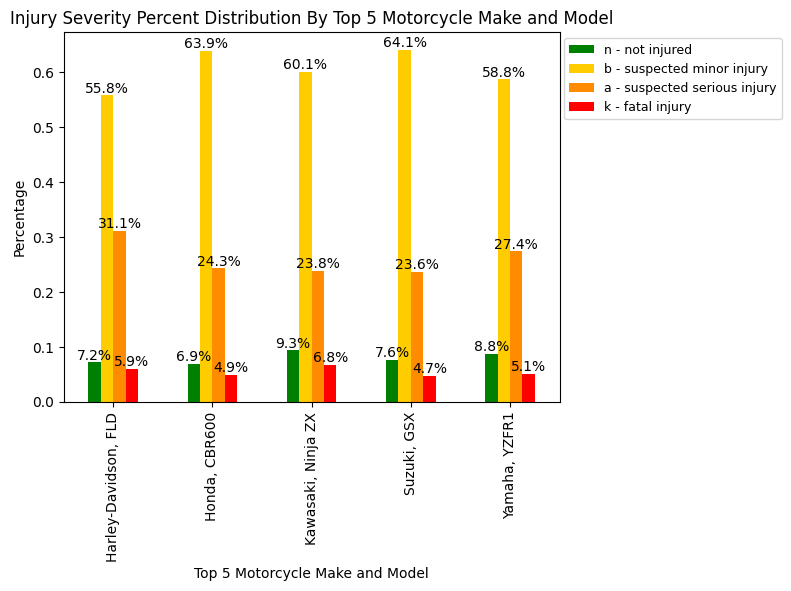

In [38]:
cross_tab = pd.crosstab(master[master.make_and_model.isin(master.make_and_model.value_counts().head().index)].make_and_model, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Top 5 Motorcycle Make and Model')
plt.xlabel('Top 5 Motorcycle Make and Model')
plt.xticks(rotation=90, ticks=range(5), labels=['Harley-Davidson, FLD', 'Honda, CBR600', 'Kawasaki, Ninja ZX', 'Suzuki, GSX', 'Yamaha, YZFR1'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [243]:
for vals in master.make_and_model.unique():
    for val in master.injury_binary.unique():
        observed = pd.crosstab(master.age_range == vals, master.injury_binary == val)
        stat, p, dof, a = stats.chi2_contingency(observed)
        alpha = 0.05
        if p < 0.05:
            print(f'\033[32m========== REJECT NULL HYPOTHESIS ==========\033[0m\n\033[35mMake and Model:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')
        else:
            print(f'\033[31m========== ACCEPT NULL HYPOTHESIS ==========\033[0m\n\033[35mMake and Model:\033[0m {vals}\n\033[35mInjury:\033[0m {val}\n\033[35mStatistic:\033[0m {stat}\n\033[35mP-Value:\033[0m {p}\n')

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fld
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fld
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsx-r600
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsx-r600
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yzfr6
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yzfr6
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, rz500
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, rz500
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zg1200
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zg1200
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zx1000
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zx1000
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fltrx
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fltrx
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxdl
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxdl
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ========

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, xl100
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, xl100
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, fz09
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, fz09
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yzf600
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yzf600
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsf600
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsf600
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: piaggio, bv
Injury: 1
Stati

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, bonneville
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, bonneville
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, er650
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, er650
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xvs1100
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xvs1100
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cm250
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cm250
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Mak

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cmx250
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, vn900
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, vn900
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhrc
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhrc
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, trophy
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, trophy
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gz250
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ======

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: m. v. agusta, f3
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: m. v. agusta, f3
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zx1200
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zx1200
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, fzs10
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, fzs10
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, fsc600
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, fsc600
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, vs1400


========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, vf1100
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, gl1500
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, gl1500
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxstc
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxstc
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, alt125
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, alt125
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: pennstyle campers inc, not applicable
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xv1600
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flstn
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flstn
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsx-s1000
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gsx-s1000
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, gunner
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, gunner
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhc
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HY

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, klx250
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, fz07
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, fz07
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flss
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flss
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxstsse3
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxstsse3
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, touring
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESI

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxstd
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhti
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhti
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxdbp
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxdbp
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: can-am, spyder roadster
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: can-am, spyder roadster
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: aprilia, rsv4
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL 

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, vt800
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, vt800
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flstfi
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flstfi
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhrxs
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhrxs
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, sr250
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, sr250
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make 

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: vespa, px
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: vespa, px
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kaf400
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kaf400
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, it250
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, it250
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, bn125
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, bn125
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gs1000
Injury: 1


========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kx80
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kx80
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, k1200
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, k1200
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kx420
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kx420
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, f800
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, f800
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cb700
Injury: 1
Statistic: 0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kz650
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cb500
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, cb500
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, classic cruiser
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, classic cruiser
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, fjr1300
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, fjr1300
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, octane
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL H

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zr800
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zr800
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, magnum
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, magnum
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, elw
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, elw
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, sv1000
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, sv1000
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ======

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf250
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf250
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kz1300
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kz1300
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, klf400
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, klf400
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhxxx
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhxxx
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Mo

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yz100
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yz100
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kz1100
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kz1100
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kle650
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kle650
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley murray inc, not applicable
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley murray inc, not applicable
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxstdse
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, c125
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, c125
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, vf1000
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, vf1000
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhtcu/i
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhtcu/i
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, hp4
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: b

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, crf230
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, m600
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: ducati, m600
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, k75
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, k75
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flh
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flh
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, xl80
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, xl80
Injury: 0
Stati

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, dr-z70
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhrs
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhrs
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, xl200
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, xl200
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, na50
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, na50
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, atc185
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, atc185


========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhtcse
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxef
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxef
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xt200
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, xt200
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, vitara
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, vitara
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, tl1000
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Mode

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, gv1200
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, tt600
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, tt600
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yxz1000
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, yxz1000
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: sym, fiddle ii
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: sym, fiddle ii
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: polaris, xplorer
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: polaris, xplorer


========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, trx350
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, trx350
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: moto guzzi, breva 750
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: moto guzzi, breva 750
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: piaggio, fly
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: piaggio, fly
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, ct1100
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, ct1100
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davids

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, vrscb
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, kingpin
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, kingpin
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxdrs
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxdrs
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, ridgeline
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: honda, ridgeline
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, boardwalk
Injury: 1
Statistic: 0.0
P-Value: 1.0

========

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, zr550
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, jackpot
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, jackpot
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, 750
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, 750
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhtnse
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, flhtnse
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, judge
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHES

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, ksf250
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, trident
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: triumph motorcycle, trident
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: big dog, mastiff
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: big dog, mastiff
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kymco usa inc, mxu
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kymco usa inc, mxu
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kymco usa inc, grand vista
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOT

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kymco usa inc, spade 150
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kx100
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, kx100
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, pe400
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: suzuki, pe400
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxbbs
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: harley-davidson, fxbbs
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, gts1000
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: moto guzzi, 1000
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: moto guzzi, 1000
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, aness
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: victory motorcycles, aness
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: toyota, unknown
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: toyota, unknown
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, ttr225
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: yamaha, ttr225
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make 

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, vn700
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kawasaki, vn700
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, r65
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: bmw, r65
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kymco usa inc, k-pipe
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: kymco usa inc, k-pipe
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: american iron horse, tejas sj
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Make and Model: american iron horse, tejas sj
Injury: 0
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
M

<b><i>
    REJECT NULL HYPOTHESIS - FOR MOST!
</i></b>

The make and model of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

(10 - DEFECTIVE OR NO VEHICLE BRAKES rejects only serious and minor injuries, almost rejects fatal)

---

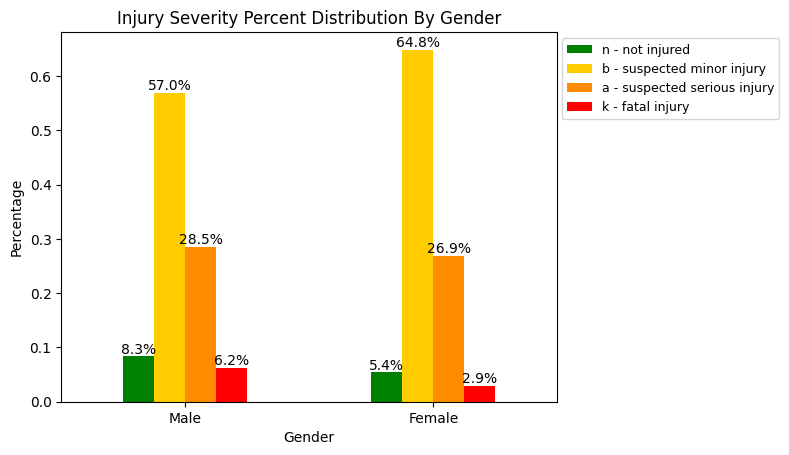

In [39]:
cross_tab = pd.crosstab(master.person_gender[~master.person_gender.str.startswith('99')], master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Injury Severity Percent Distribution By Gender')
plt.xlabel('Gender')
plt.xticks(rotation=0, ticks=range(2), labels=['Male', 'Female'])
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9})
legend.set_bbox_to_anchor((1.46, 1))
plt.show()

In [44]:
import re
cont_thing.replace(to_replace=re.compile(r'.*speed.*', re.IGNORECASE), value='SPEEDING', regex=True)

,crash_id,$1000_damage_to_any_one_person's_property,active_school_zone_flag,adjusted_average_daily_traffic_amount,adjusted_percentage_of_average_daily_traffic_for_trucks,adjusted_roadway_part,agency,at_intersection_flag,average_daily_traffic_amount,average_daily_traffic_year,...,charge,citation,person_age,person_ethnicity,person_gender,person_helmet,person_injury_severity,person_type,physical_location_of_an_occupant,crash_datetime
0,16189632,No,NO,no data,no data,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,no data,no data,...,OPERATE UNREGISTERED MOTOR VEHICLE,TX52Q80UKZPL,37,W - WHITE,1 - MALE,1 - NOT WORN,A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-01 11:23:00
1,16203470,No,NO,no data,no data,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,no data,no data,...,"NO CLASS ""M"" LICENSE",TX52QD0NAP34,30,H - HISPANIC,1 - MALE,"3 - WORN, NOT DAMAGED",B - SUSPECTED MINOR INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-04 13:16:00
2,16192023,Yes,NO,no data,no data,1 - MAIN/PROPER LANE,HARRIS COUNTY SHERIFF'S OFFICE,False,no data,no data,...,NO CHARGES,no data,21,W - WHITE,1 - MALE,"2 - WORN, DAMAGED",A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-05 20:45:00
3,16196720,No,NO,no data,no data,1 - MAIN/PROPER LANE,MCALLEN POLICE DEPARTMENT,False,no data,no data,...,NO DRIVER LICENSE NO INSURANCE,667341,18,H - HISPANIC,1 - MALE,1 - NOT WORN,B - SUSPECTED MINOR INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-05 03:07:00
4,16189103,Yes,NO,1426,7.1,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,1426,2019,...,NO CHARGES,no data,28,W - WHITE,1 - MALE,"3 - WORN, NOT DAMAGED",B - SUSPECTED MINOR INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2018-01-06 12:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14169,19321499,Yes,NO,1211,6.9,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,1211,2019,...,NO CHARGES,no data,49,W - WHITE,2 - FEMALE,1 - NOT WORN,B - SUSPECTED MINOR INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2022-12-31 11:26:00
14170,19323296,Yes,NO,no data,no data,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,no data,no data,...,NO CHARGES,no data,33,W - WHITE,1 - MALE,1 - NOT WORN,A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2022-12-31 22:29:00
14171,19327850,No,NO,no data,no data,1 - MAIN/PROPER LANE,HARRIS COUNTY CONSTABLE PRECINCT 4,False,no data,no data,...,NO CHARGES,no data,35,W - WHITE,1 - MALE,"4 - WORN, UNK DAMAGE",A - SUSPECTED SERIOUS INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2022-12-31 15:55:00
14172,19330330,No,NO,no data,no data,1 - MAIN/PROPER LANE,"DEPARTMENT OF PUBLIC SAFETY, STATE OF TEXAS",False,no data,no data,...,FAIL TO DRIVE IN SINGLE LANE,TX6HCF0DDEIM,42,B - BLACK,2 - FEMALE,"4 - WORN, UNK DAMAGE",B - SUSPECTED MINOR INJURY,5 - DRIVER OF MOTORCYCLE TYPE VEHICLE,1 - FRONT LEFT OR MOTORCYCLE DRIVER,2022-12-31 14:49:00


Group alcohol

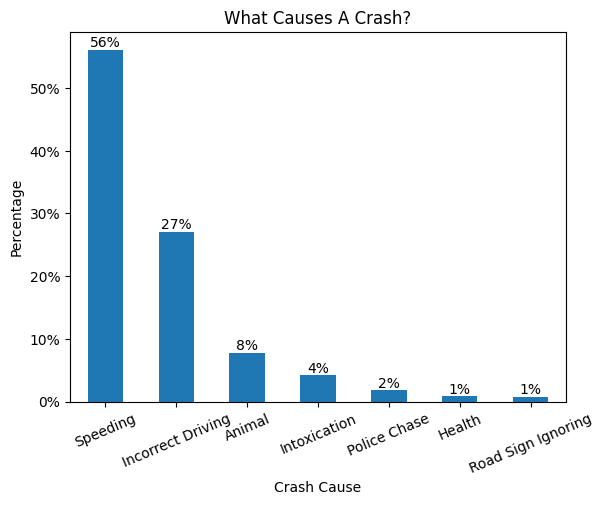

In [72]:
cont_thing = w.wrangle()
cont_thing = cont_thing[~cont_thing.contributing_factor_1.str.startswith('98')]
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*no\sdata.*', re.IGNORECASE), value='SPEEDING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*speed.*', re.IGNORECASE), value='SPEEDING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*intoxicated.*', re.IGNORECASE), value='INTOXICATED-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*alcohol.*', re.IGNORECASE), value='INTOXICATED-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*drinking.*', re.IGNORECASE), value='INTOXICATED-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*drug.*', re.IGNORECASE), value='INTOXICATED-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*animal.*', re.IGNORECASE), value='ANIMAL-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*heed.*', re.IGNORECASE), value='ROADSIGN-IGNORING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*disregard.*', re.IGNORECASE), value='ROADSIGN-IGNORING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*evasive\saction.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*driver\sinattention.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*single\slane.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*lane\swhen\sunsafe.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*too\sclosely.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*turned\swhen.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*turned\simproperly.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*improper\sstart.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*failed.*', re.IGNORECASE), value='INCORRECT-DRIVING-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*evading\spolice.*', re.IGNORECASE), value='POLICE-CHASE-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*ill.*', re.IGNORECASE), value='HEALTH-RELATED', regex=True)
cont_thing.contributing_factor_1 = cont_thing.contributing_factor_1.replace(to_replace=re.compile(r'.*fatigued.*', re.IGNORECASE), value='HEALTH-RELATED', regex=True)
ax = cont_thing.contributing_factor_1.value_counts(normalize=True).head(7).plot(kind='bar')
plt.title('What Causes A Crash?')
plt.xlabel('Crash Cause')
plt.xticks(rotation=23, ticks=range(7), labels=['Speeding', 'Incorrect Driving', 'Animal', 'Intoxication', 'Police Chase', 'Health', 'Road Sign Ignoring'])
plt.ylabel('Percentage')
plt.yticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5], labels=['0%', '10%', '20%', '30%', '40%', '50%'])
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [77]:
cross_tab

person_injury_severity,n - not injured,b - suspected minor injury,a - suspected serious injury,k - fatal injury
make_and_model,,,,
"harley-davidson, fld",0.071880,0.558038,0.310831,0.059252
"honda, cbr600",0.068592,0.638989,0.243081,0.049338
"yamaha, yzfr1",0.087580,0.587580,0.273885,0.050955


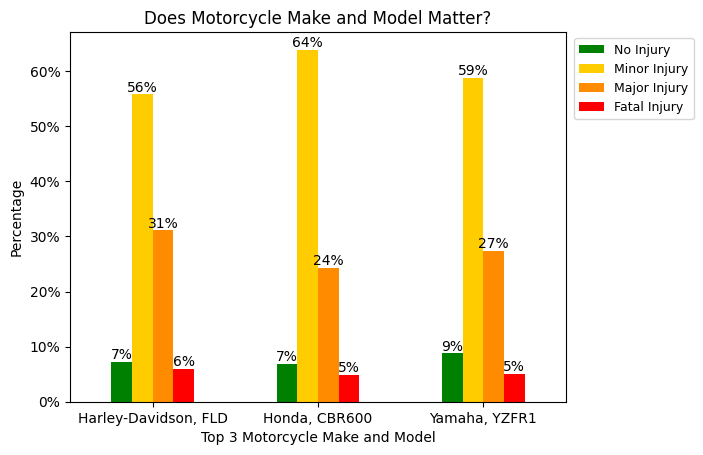

In [78]:
cross_tab = pd.crosstab(master[master.make_and_model.isin(master.make_and_model.value_counts().head(3).index)].make_and_model, master.person_injury_severity, normalize='index')
desired_order = ['n - not injured', 'b - suspected minor injury', 'a - suspected serious injury', 'k - fatal injury']
cross_tab = cross_tab[desired_order]
colors = ['green', '#FFCC00', 'darkorange', 'red']
ax = cross_tab.plot(kind='bar', color=colors)
plt.title('Does Motorcycle Make and Model Matter?')
plt.xlabel('Top 3 Motorcycle Make and Model')
plt.xticks(rotation=0, ticks=range(3), labels=['Harley-Davidson, FLD', 'Honda, CBR600', 'Yamaha, YZFR1'])
plt.ylabel('Percentage')
plt.yticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], labels=['0%', '10%', '20%', '30%', '40%', '50%', '60%'])
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
legend = plt.legend(loc='upper right', prop={'size': 9}, labels=['No Injury', 'Minor Injury', 'Major Injury', 'Fatal Injury'])
legend.set_bbox_to_anchor((1.27, 1))
plt.show()